In [1]:
import sys
sys.path.append('../')
import tensorflow as tf
import numpy as np
# from models import *
# from test import *
# from utils.misc import timeit

# import os
# import pickle
# from utils.misc import calculate_flops
from agent import Agent

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
class arguments():
    model = 'FCN8sMobileNet'
    mode = 'inference'
    operator = 'Train'
    
    # Directories arguments
    data_dir = "/media/DATA/UnrealLandingDataset/AirSimCollectData/" #"full_cityscapes_res"
    exp_dir =  "fcn8s_mobilenet"
    out_dir = "fcn8s_mobilenet"

    # Data arguments
    img_height = 512
    img_width = 512 
    num_channels = 3
    num_classes = 18
    # Train arguments
    num_epochs = 1 
    batch_size = 1
    shuffle = False
    data_mode = "test"
    save_every = 5
    test_every = 5
    max_to_keep = 5
    weighted_loss = False
    random_cropping = False

    # Models arguments
    learning_rate = 0.0001
    weight_decay = 0.0005
    pretrained_path = "../pretrained_weights/mobilenet_v1.pkl"
    batchnorm_enabled = True
    # Misc arguments
    verbose = False
    
    checkpoint_dir = '/home/brianyao/Documents/TFSegmentation/experiments/fcn8s_mobilenet/checkpoints'
    checkpoint_best_dir = '/home/brianyao/Documents/TFSegmentation/experiments/fcn8s_mobilenet/checkpoints/best'
    summary_dir = 'temp_summary'

In [3]:
args = arguments

In [4]:
agent = Agent(args)

In [5]:
# agent.run()

In [5]:
# Reset the graph
tf.reset_default_graph()

# Create the sess
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)
gpu_options = tf.GPUOptions(allow_growth=True)
agent.sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options, allow_soft_placement=True))

# Create Model class and build it
with agent.sess.as_default():
    agent.build_model()

# Create the operator
agent.operator = agent.operator(agent.args, agent.sess, agent.model, agent.model)

agent.operator.load_best_model()

Building Test Network

Building the MODEL...
Building the MobileNet..
Layer_name: network/mobilenet_encoder/conv_1/Relu6 -Output_Shape: [1, 256, 256, 32]
Layer_name: network/mobilenet_encoder/conv_ds_2/pointwise/Relu6 -Output_Shape: [1, 256, 256, 64]
Layer_name: network/mobilenet_encoder/conv_ds_3/pointwise/Relu6 -Output_Shape: [1, 128, 128, 128]
Layer_name: network/mobilenet_encoder/conv_ds_4/pointwise/Relu6 -Output_Shape: [1, 128, 128, 128]
Layer_name: network/mobilenet_encoder/conv_ds_5/pointwise/Relu6 -Output_Shape: [1, 64, 64, 256]
Layer_name: network/mobilenet_encoder/conv_ds_6/pointwise/Relu6 -Output_Shape: [1, 64, 64, 256]
Layer_name: network/mobilenet_encoder/conv_ds_7/pointwise/Relu6 -Output_Shape: [1, 32, 32, 512]
Layer_name: network/mobilenet_encoder/conv_ds_8/pointwise/Relu6 -Output_Shape: [1, 32, 32, 512]
Layer_name: network/mobilenet_encoder/conv_ds_9/pointwise/Relu6 -Output_Shape: [1, 32, 32, 512]
Layer_name: network/mobilenet_encoder/conv_ds_10/pointwise/Relu6 -Output_

Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/moving_va

Layer Loaded  mobilenet_encoder/fc/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobil

Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/ba

Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/bat

Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/fc/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/be

Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder

Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_d

Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/moving_mean:0
Layer Loaded  m

Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/co

Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/co

Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/fc/biases:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_variance:0
Layer Loaded

Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/

Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/movi

Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/co

Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_enc

Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/c

Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_1/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/moving_

Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds

Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_norm

Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_d

Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encod

Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/fc/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_variance:0
Layer Lo

Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_1/wei

Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointw

Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_variance:0
Layer Loa

Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/fc/biases:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/weights:0
Layer Loaded  mo

Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_1/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/weights:0
Layer

Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/fc/biases:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encod

Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_1/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/weights:0
Layer Loaded  mo

Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds

Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encode

Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise

Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/moving_variance:0
Layer Loaded

Layer Loaded  mobilenet_encoder/conv_1/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet

Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/p

Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/gamma:0
L

Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/fc/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/moving_variance:

Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/moving_variance:0
Layer Loaded  

Layer Loaded  mobilenet_encoder/fc/biases:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwi

Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder

Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_norma

Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_

Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_

Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_1/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/weights:0
Layer

Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/fc/biases:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilene

Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/fc/biases:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_mean:0
Layer Loaded  

Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/beta:0
Layer 

Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/fc/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/co

Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_1/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/weights:0
Layer Loaded  mobilenet_encode

Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/gamma:0
Layer Loaded  

Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/moving_m

Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/con

Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/fc/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving

Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_1/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/

Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/fc/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/b

Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/fc/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds

Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/

Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/fc/biases:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilene

Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_d

Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/weights:0
Layer Loaded  mobilenet_en

Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_1/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/moving_

Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv

Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/fc/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobil

Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/b

Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/co

Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encod

Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_d

Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/

Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encode

Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch

Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normal

Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encod

Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_7/p

Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/fc/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_norma

Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normali

Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/fc/biases:

Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_

Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/p

Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_1/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointw

Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalizati

Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10

Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/fc/biases:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointw

Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/fc/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise

Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalizati

Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_1/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/weights:0
Layer Loaded  mo

Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/con

Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_

Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder

Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/fc/biases:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/gamma:0
Layer Loaded  mobi

Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_norm

Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/weights:0
Layer Loa

Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder

Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/b

Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/wei

Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/ba

Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_norma

Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/beta:0
Layer Loaded  mo

Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/w

Layer Loaded  mobilenet_encoder/conv_ds_5/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/bat

Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_11/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_1/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/moving_variance:0
Layer Loaded

Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/fc/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_13/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_mean:0


Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/fc/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_11/depthwise/batch_normalization/gamma:0
Layer Loaded  mo

Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_7/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_2/depthwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_4/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds

Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_6/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/weights:0
Layer Loaded  mobilenet_encoder/conv_ds_12/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/co

Layer Loaded  mobilenet_encoder/conv_ds_10/depthwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_6/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_14/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_2/pointwise/weights:0
Layer Loaded  mobilenet_encoder/conv_1/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_7/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_

Layer Loaded  mobilenet_encoder/conv_ds_8/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_3/pointwise/batch_normalization/moving_variance:0
Layer Loaded  mobilenet_encoder/conv_ds_10/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_3/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/pointwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_9/depthwise/batch_normalization/moving_mean:0
Layer Loaded  mobilenet_encoder/conv_ds_13/pointwise/batch_normalization/gamma:0
Layer Loaded  mobilenet_encoder/conv_ds_5/pointwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_4/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_8/depthwise/batch_normalization/beta:0
Layer Loaded  mobilenet_encoder/conv_ds_12/depthwise/batch_normalization/moving_mean:

Model loaded from the latest checkpoint

   [-] load_model : 30.19591 sec, which is 0.50327 mins, which is 0.00839 hours
Loading Validation data..
Validation-shape-x -- (1720, 512, 512, 3)
Validation-shape-y -- (1720, 512, 512)
Validation data is loaded
   [-] load_val_data : 2.55105 sec, which is 0.04252 mins, which is 0.00071 hours
loading a checkpoint for BEST ONE
Loading model checkpoint /home/brianyao/Documents/TFSegmentation/experiments/fcn8s_mobilenet/checkpoints/best/-86100 ...

INFO:tensorflow:Restoring parameters from /home/brianyao/Documents/TFSegmentation/experiments/fcn8s_mobilenet/checkpoints/best/-86100
BEST MODEL LOADED..


In [6]:
'''Test single image'''
agent.operator.metrics.reset()
for i in range(agent.operator.test_data['X'].shape[0]):
    x_batch = agent.operator.test_data['X'][i:i+1,:,:,:]
    y_batch = agent.operator.test_data['Y'][i:i+1,:,:]
    feed_dict = {agent.operator.test_model.x_pl: x_batch,
                 agent.operator.test_model.y_pl: y_batch,
                 agent.operator.test_model.is_training: False
                 }


    # run the feed_forward
    segmentation = agent.operator.sess.run([agent.operator.test_model.out_argmax],
                                            feed_dict=feed_dict)
    segmentation = segmentation[0]
    
    agent.operator.metrics.update_metrics(segmentation, y_batch, 0, 0)
    
    if i % 100 == 0:
        print(i)

mean_iou = agent.operator.metrics.compute_final_metrics(1)


0
100
200
300
400
500
900
1000
1100
1200
1300
1400
1500
1600
1700
Model: {} Mean_iou: {} FCN8sMobileNet 0.7649824858150062


In [12]:
print('Model: %s \nMean_iou: %2f' %(args.model, mean_iou))

Model: FCN8sMobileNet 
Mean_iou: 0.764982


In [26]:
from utils.seg2rgb import *
cmap_list, seg2rgb_map = get_seg2rgb_map('/media/DATA/UnrealLandingDataset/AirSimCollectData/seg_rgbs.txt', 18)

In [9]:

seg_rgb = np.zeros([segmentation.shape[0], segmentation.shape[1], 3])
all_classes = np.unique(segmentation)
for i in all_classes:
    seg_rgb[np.where(segmentation == i)] = seg2rgb_map[i][:3]

gt_seg_rgb = np.zeros([y_batch[0].shape[0], y_batch[0].shape[1], 3])
all_gt_classes = np.unique(y_batch[0])
for i in all_gt_classes:
    gt_seg_rgb[np.where(y_batch[0] == i)] = seg2rgb_map[i][:3]


<IPython.core.display.Javascript object>


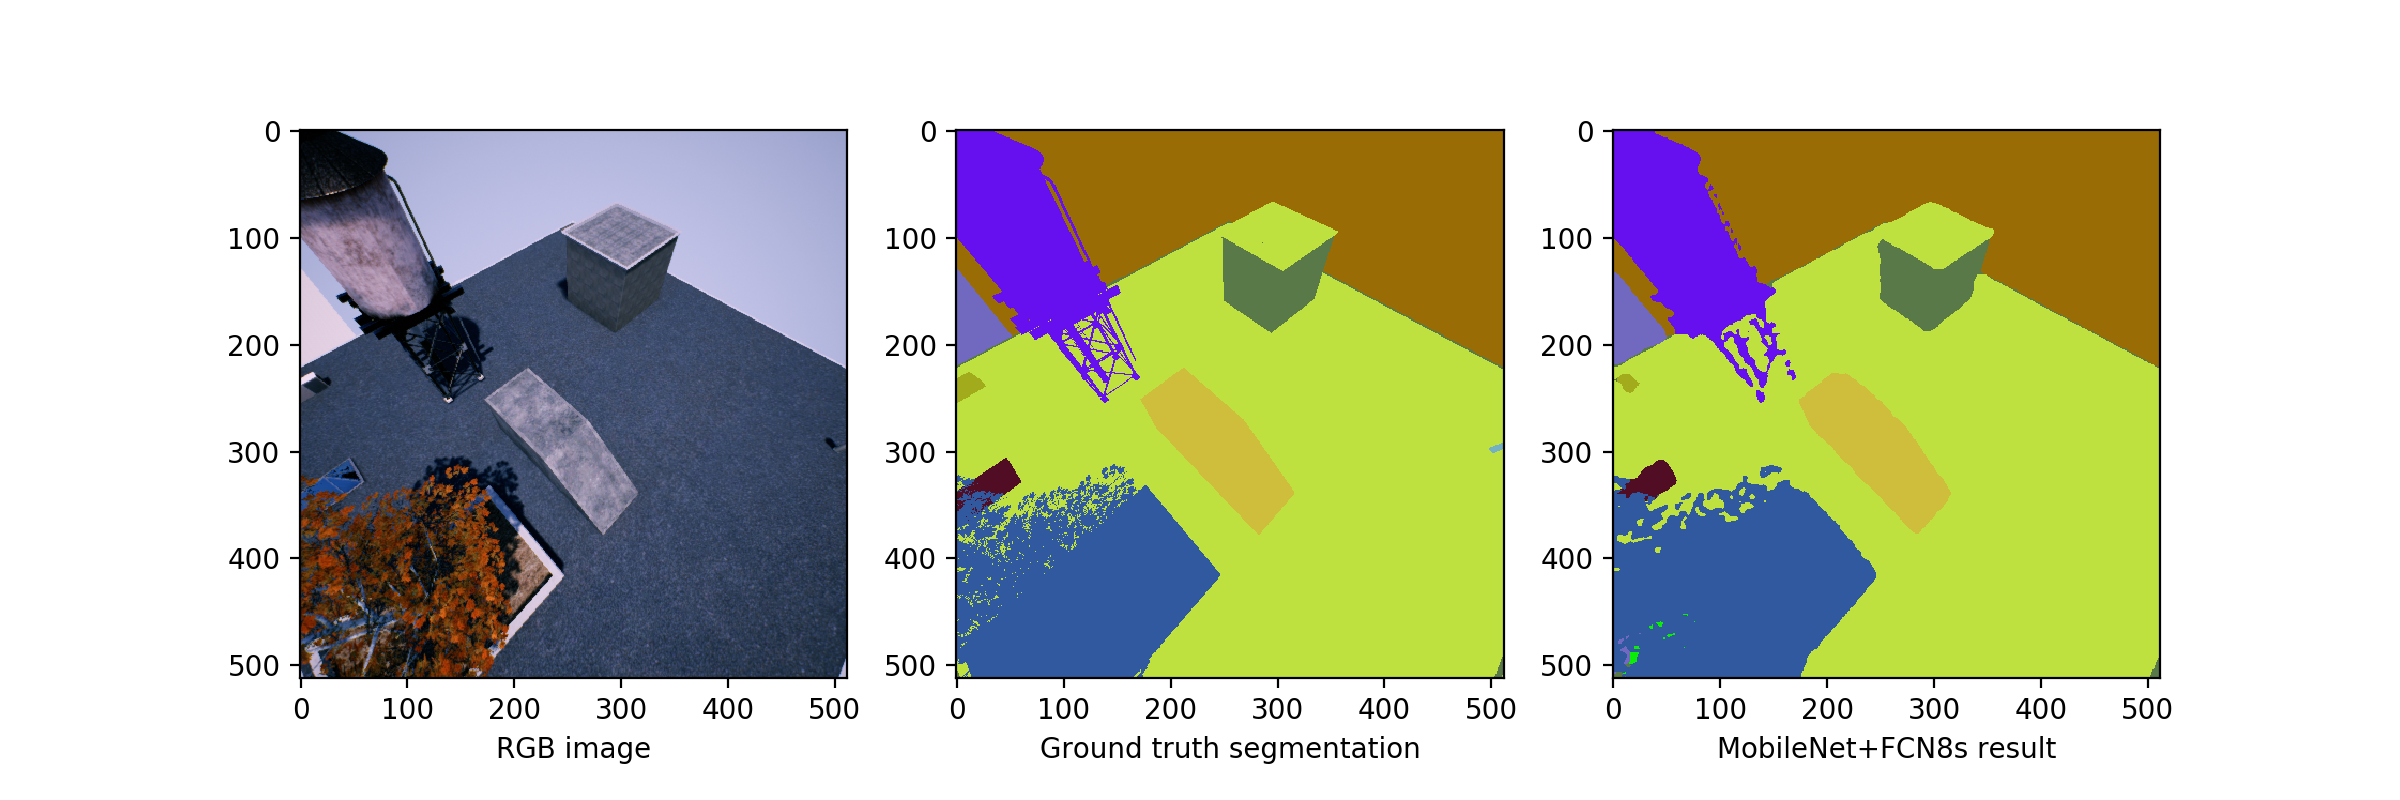

Text(0.5, 0, 'MobileNet+FCN8s result')

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.imshow(x_batch[0])
ax1.set_xlabel("RGB image")
ax2.imshow(gt_seg_rgb)
ax2.set_xlabel("Ground truth segmentation")
ax3.imshow(seg_rgb)
ax3.set_xlabel("MobileNet+FCN8s result")


In [21]:
'''inference on small shot test dataset'''
import os
SMALL_SHOT_DATA_DIR = '/media/DATA/UnrealLandingDataset/LidarRoofTest'
img_np_file = os.path.join(SMALL_SHOT_DATA_DIR,'x_batch.npy')
label_np_file = os.path.join(SMALL_SHOT_DATA_DIR,'y_batch.npy')

x_batch = np.load(img_np_file)
print(x_batch.shape)
y_batch = np.load(label_np_file)
print(x_batch.shape)

all_outputs = []
for i in range(x_batch.shape[0]):
    feed_dict = {agent.operator.test_model.x_pl: x_batch[i:i+1,:,:,:],
                 agent.operator.test_model.y_pl: y_batch[i:i+1,:,:,0],
                 agent.operator.test_model.is_training: False
                 }


    # run the feed_forward
    segmentation = agent.operator.sess.run([agent.operator.test_model.out_argmax],
                                            feed_dict=feed_dict)
    segmentation = segmentation[0]
    all_outputs.append(segmentation)
all_outputs = np.array(all_outputs)

(8, 512, 512, 3)
(8, 512, 512, 3)


In [24]:
np.save('seg_outputs.npy', all_outputs)

<IPython.core.display.Javascript object>


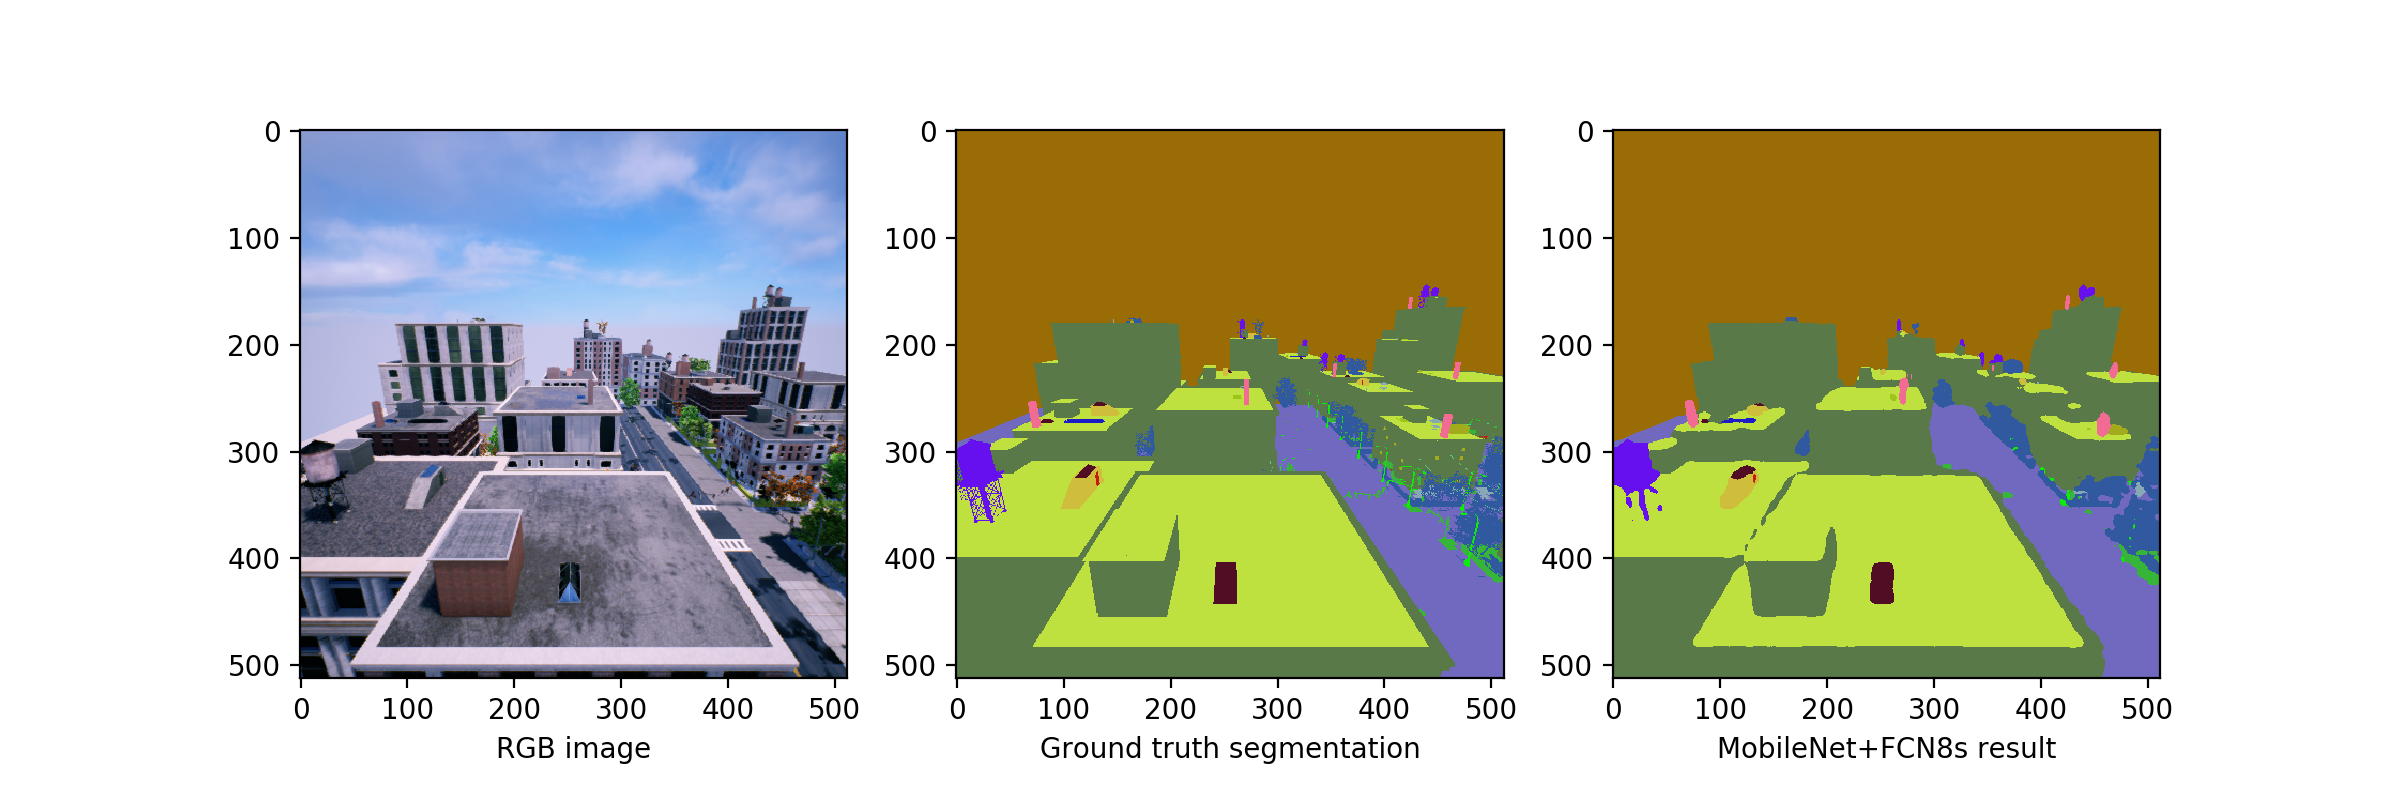

Text(0.5, 0, 'MobileNet+FCN8s result')

In [29]:
segmentation = segmentation.squeeze(0)
seg_rgb = np.zeros([segmentation.shape[0], segmentation.shape[1], 3])
all_classes = np.unique(segmentation)
for i in all_classes:
    seg_rgb[np.where(segmentation == i)] = seg2rgb_map[i][:3]
    
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.imshow(x_batch[-1])
ax1.set_xlabel("RGB image")
ax2.imshow(y_batch[-1])
ax2.set_xlabel("Ground truth segmentation")
ax3.imshow(seg_rgb)
ax3.set_xlabel("MobileNet+FCN8s result")
